<a href="https://colab.research.google.com/github/rmahesh6386/Tata-Motors-Project-/blob/main/TATA_Motors_Stock_market_Forecasting_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [ ]:
#!pip install yfinance 

In [2]:
df=pd.read_csv("TATAMOTORS.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,179.029724,183.086212,176.902542,181.997894,176.739136,10175802.0
1,2012-01-03,184.273483,192.732742,184.224014,191.891769,186.347137,15868503.0
2,2012-01-04,191.792831,200.351028,190.951843,199.064835,193.312943,22752471.0
3,2012-01-05,198.817490,203.566544,198.075439,199.955276,194.177658,21640778.0
4,2012-01-06,197.877563,202.824509,196.393478,201.439362,195.618835,13553191.0
...,...,...,...,...,...,...,...
2466,2021-12-27,465.700012,472.450012,460.100006,471.149994,471.149994,12557565.0
2467,2021-12-28,475.200012,482.799988,472.649994,480.200012,480.200012,22860916.0
2468,2021-12-29,478.750000,481.600006,474.250000,476.000000,476.000000,10263884.0
2469,2021-12-30,472.549988,476.399994,468.600006,470.399994,470.399994,11923961.0


In [4]:
Tatamotors=df.dropna()

In [5]:
Tatamotors

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-02,179.029724,183.086212,176.902542,181.997894,176.739136,10175802.0
1,2012-01-03,184.273483,192.732742,184.224014,191.891769,186.347137,15868503.0
2,2012-01-04,191.792831,200.351028,190.951843,199.064835,193.312943,22752471.0
3,2012-01-05,198.817490,203.566544,198.075439,199.955276,194.177658,21640778.0
4,2012-01-06,197.877563,202.824509,196.393478,201.439362,195.618835,13553191.0
...,...,...,...,...,...,...,...
2466,2021-12-27,465.700012,472.450012,460.100006,471.149994,471.149994,12557565.0
2467,2021-12-28,475.200012,482.799988,472.649994,480.200012,480.200012,22860916.0
2468,2021-12-29,478.750000,481.600006,474.250000,476.000000,476.000000,10263884.0
2469,2021-12-30,472.549988,476.399994,468.600006,470.399994,470.399994,11923961.0


In [6]:
Tatamotors.index=pd.to_datetime(Tatamotors.Date)
Tatamotors=Tatamotors["Close"]['2012-01-01':'2022-01-01']

In [7]:
Tatamotors

Date
2012-01-02    181.997894
2012-01-03    191.891769
2012-01-04    199.064835
2012-01-05    199.955276
2012-01-06    201.439362
                 ...    
2021-12-27    471.149994
2021-12-28    480.200012
2021-12-29    476.000000
2021-12-30    470.399994
2021-12-31    482.399994
Name: Close, Length: 2465, dtype: float64

In [8]:
Tatamotors.describe()

count    2465.000000
mean      327.679795
std       127.904089
min        65.300003
25%       233.693405
50%       324.222382
75%       432.313019
max       598.134399
Name: Close, dtype: float64

In [18]:
import plotly.express as px
import matplotlib.pyplot as plt
fig = px.line(Tatamotors, y="Close", title='Tatamotors closing price')
fig.show()

First, we need to check if a series is stationary or not because time series analysis only works with stationary data.

**ADF (Augmented Dickey-Fuller) Test**

Null Hypothesis: The series has a unit root (value of a =1)


Alternate Hypothesis: The series has no unit root.


If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.


If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.

In [19]:
#So let's check for stationarity:
from statsmodels.tsa.stattools import adfuller
print("Results of dickey fuller test")
adft = adfuller(Tatamotors,autolag='AIC')

# output for dft will give us without defining what the values are.
#hence we manually write what values does it explains using a for loop

output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical value (%s)'%key] =  values
print(output)

#test_stationarity(df_close)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Results of dickey fuller test
Test Statistics                  -1.553793
p-value                           0.506753
No. of lags used                  0.000000
Number of observations used    2464.000000
critical value (1%)              -3.433007
critical value (5%)              -2.862714
critical value (10%)             -2.567395
dtype: float64


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis. Also, the test statistics is greater than the critical values. so the data is non-stationary.


In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

<Figure size 432x288 with 0 Axes>

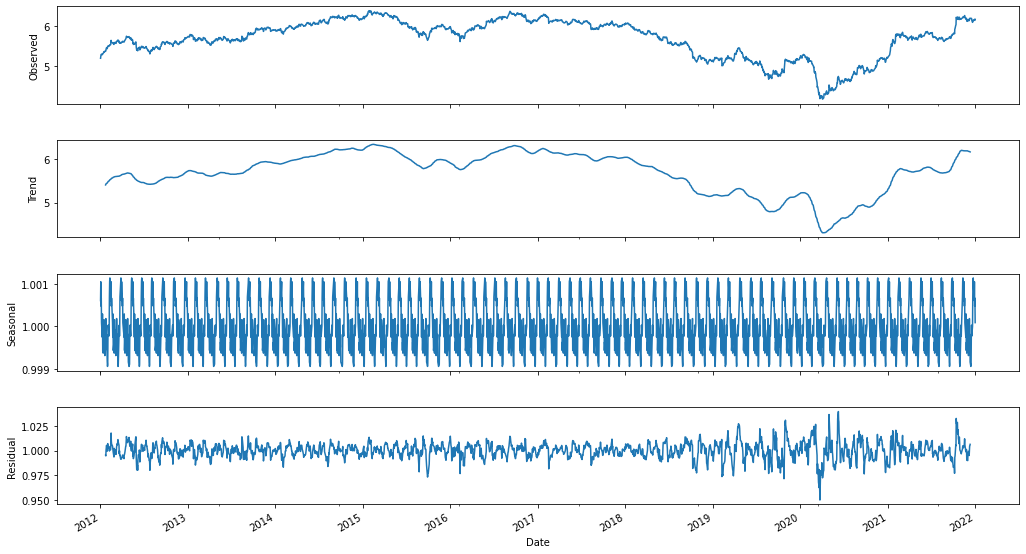

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(ts_log, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

We start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

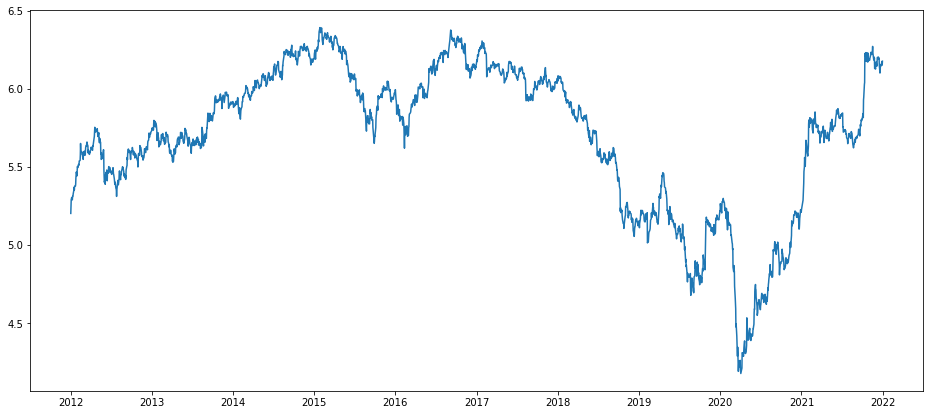

In [20]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)

#USING LOG TRANSFORM
import numpy as np
ts_log=np.log(Tatamotors)
plt.plot(ts_log)

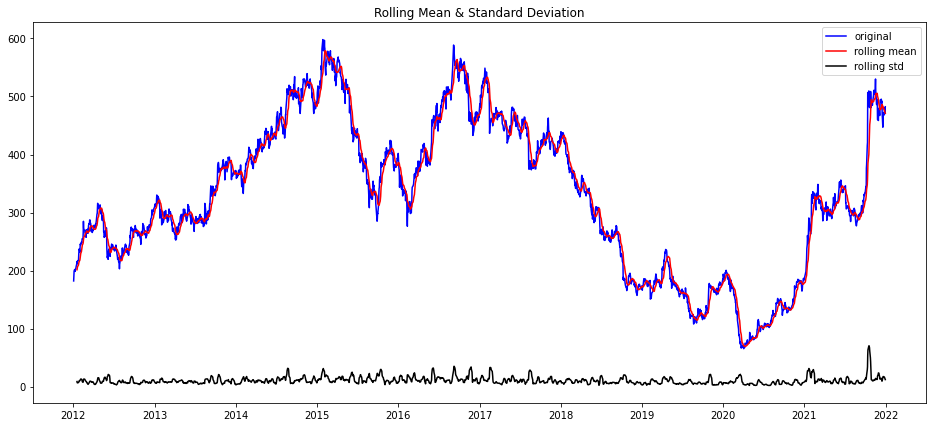

In [ ]:
rollmean=Tatamotors.rolling(12).mean()
rollstd=Tatamotors.rolling(12).std()

plt.figure(figsize=(16,7))
fig=plt.figure(1)

#PLOT ROLLING sTATISTICS:
orig = plt.plot(Tatamotors,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

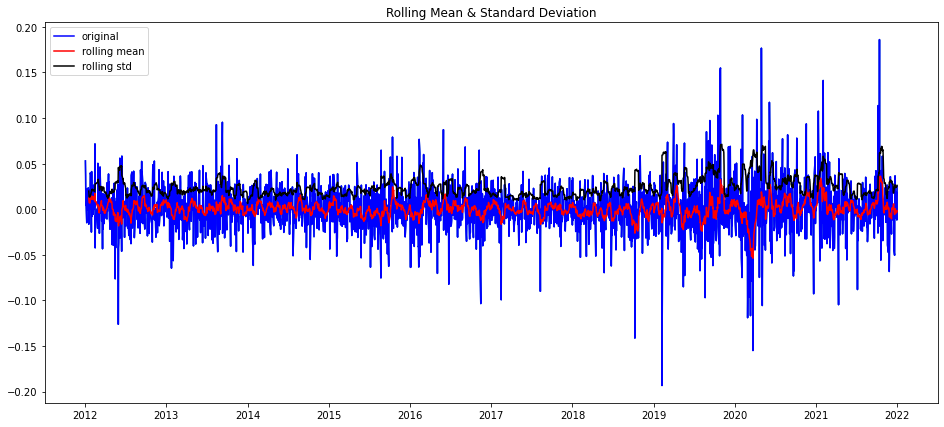

In [ ]:
#Lets try Differencing
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

#Determining rolling statistics
rollmean = ts_log_diff.rolling(12).mean()
rollstd = ts_log_diff.rolling(12).std()



#plot rolling statistics
orig = plt.plot(ts_log_diff,color = 'blue',label='original')
mean = plt.plot(rollmean,color = 'red',label = 'rolling mean')
std = plt.plot(rollstd,color = 'black',label = 'rolling std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [ ]:
Tatamotors.sort_index(inplace=True)

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



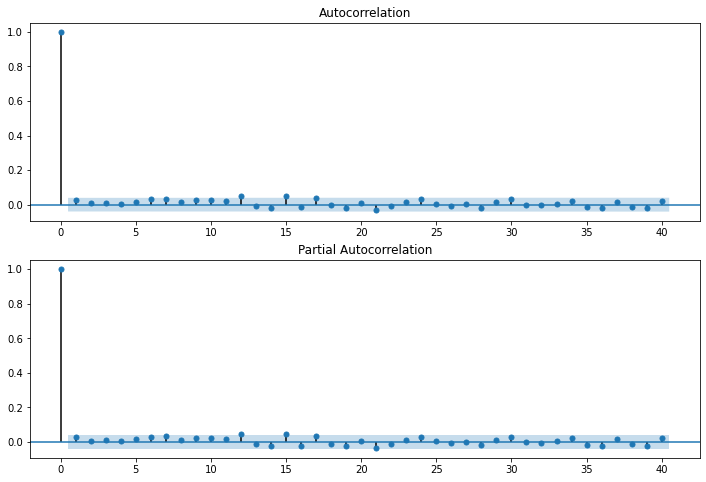

In [ ]:
import statsmodels.api as sm
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



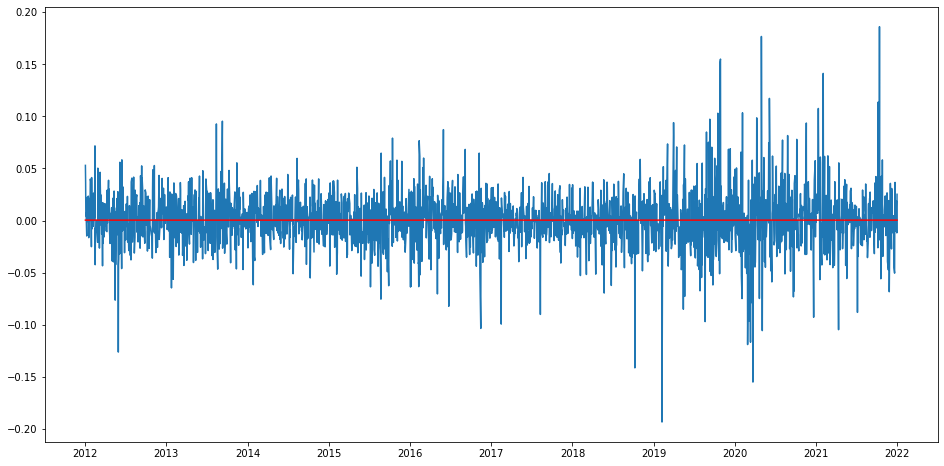

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(0, 1, 0))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [ ]:
#Taking fitted values in Series
ARIMA_diff_predictions=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(ARIMA_diff_predictions.head())

Date
2012-01-03    0.000396
2012-01-04    0.000396
2012-01-05    0.000396
2012-01-06    0.000396
2012-01-09    0.000396
dtype: float64


In [ ]:
#Taking cumulative sum since we have differenced the timeseries
ARIMA_diff_predictions_cumsum=ARIMA_diff_predictions.cumsum()
print(ARIMA_diff_predictions_cumsum.head())

Date
2012-01-03    0.000396
2012-01-04    0.000791
2012-01-05    0.001187
2012-01-06    0.001582
2012-01-09    0.001978
dtype: float64


In [ ]:
ARIMA_log_prediction=pd.Series(ts_log.iloc[0],index=ts_log.index)
ARIMA_log_prediction=ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2012-01-02    5.203995
2012-01-03    5.204391
2012-01-04    5.204786
2012-01-05    5.205182
2012-01-06    5.205578
dtype: float64

Text(0.5, 1.0, 'RMSE: 179.0089')

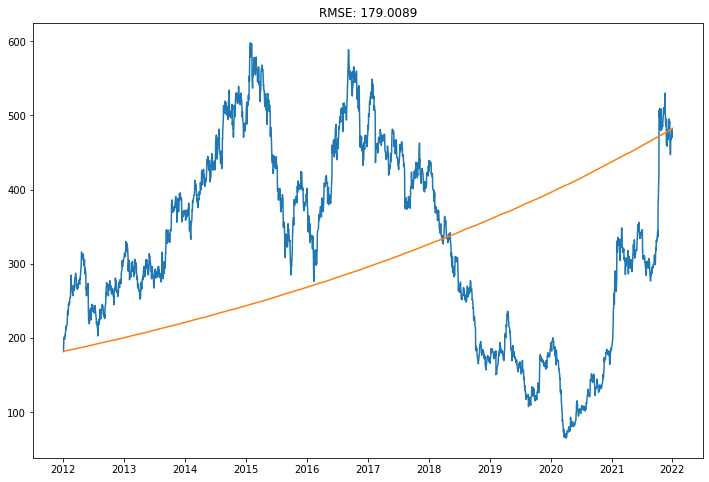

In [ ]:
plt.figure(figsize=(12,8))
predictions_ARIMA=np.exp(ARIMA_log_prediction)
plt.plot(Tatamotors)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-Tatamotors)**2)/len(Tatamotors)))

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 3.9 MB/s 
     |████████████████████████████████| 9.8 MB 43.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel=pm.auto_arima(timeseries,
                           start_p=3,
                           start_q=3,
                           max_p=5,
                           max_q=5,
                           test="adf",
                           seasonal=True,
                           trace=True)
    return automodel